In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
# Load the Results table into a DataFrame
results_df = pd.read_csv('results.csv')  # Replace 'path/to/results.csv' with the actual path to your Results CSV file

# Assuming you have separate tables for Drivers and Constructors
drivers_df = pd.read_csv('drivers_org.csv')
constructors_df = pd.read_csv('constructors.csv')
status_df=pd.read_csv('status.csv')
lap_times_df= pd.read_csv('lap_times.csv')
pit_stops_df= pd.read_csv('pit_stops.csv')

In [3]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26180 entries, 0 to 26179
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26180 non-null  int64  
 1   raceId           26180 non-null  int64  
 2   driverId         26180 non-null  int64  
 3   constructorId    26180 non-null  int64  
 4   number           26180 non-null  object 
 5   grid             26180 non-null  int64  
 6   position         26180 non-null  object 
 7   positionText     26180 non-null  object 
 8   positionOrder    26180 non-null  int64  
 9   points           26180 non-null  float64
 10  laps             26180 non-null  int64  
 11  time             26180 non-null  object 
 12  milliseconds     26180 non-null  object 
 13  fastestLap       26180 non-null  object 
 14  rank             26180 non-null  object 
 15  fastestLapTime   26180 non-null  object 
 16  fastestLapSpeed  26180 non-null  object 
 17  statusId    

In [4]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     858 non-null    int64 
 1   driverRef    858 non-null    object
 2   number       858 non-null    object
 3   code         858 non-null    object
 4   forename     858 non-null    object
 5   surname      858 non-null    object
 6   dob          858 non-null    object
 7   nationality  858 non-null    object
 8   url          858 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.5+ KB


In [5]:
constructors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [6]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [7]:
lap_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557007 entries, 0 to 557006
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        557007 non-null  int64 
 1   driverId      557007 non-null  int64 
 2   lap           557007 non-null  int64 
 3   position      557007 non-null  int64 
 4   time          557007 non-null  object
 5   milliseconds  557007 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.5+ MB


In [8]:
pit_stops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10337 non-null  int64 
 1   driverId      10337 non-null  int64 
 2   stop          10337 non-null  int64 
 3   lap           10337 non-null  int64 
 4   time          10337 non-null  object
 5   duration      10337 non-null  object
 6   milliseconds  10337 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 565.4+ KB


In [9]:
# Remove the 'duration' from pit_stops and 'time' column from both datasets
pit_stops_df = pit_stops_df.drop(columns=['duration'])
lap_times_df = lap_times_df.drop(columns=['time'])
pit_stops_df = pit_stops_df.drop(columns=['time'])

#rename
lap_times_df = lap_times_df.rename(columns={'milliseconds': 'lap_duration'})
lap_times_df = lap_times_df.rename(columns={'lap': 'lap_laptimes'})
lap_times_df = lap_times_df.rename(columns={'position': 'position_laptimes'})
pit_stops_df = pit_stops_df.rename(columns={'milliseconds': 'pit_stop_duration'})
pit_stops_df = pit_stops_df.rename(columns={'lap': 'lap_pitstops'})




In [ ]:
#Merge pit_stops and lap_times
race_details = pd.merge(lap_times_df, pit_stops_df, on=['raceId', 'driverId'], how='inner')

# Merge the Results DataFrame with the Drivers and Constructors DataFrames to get the driver and constructor information
results_df = pd.merge(results_df, drivers_df[['driverId', 'driverRef','dob','nationality']], how='left', on='driverId')
results_df = pd.merge(results_df, constructors_df[['constructorId', 'name']], how='left', on='constructorId')
results_df = pd.merge(results_df,status_df[['statusId', 'status']], how='left', on='statusId')
results_df = pd.merge(results_df, race_details, on=['raceId', 'driverId'], how='inner')

# Rename the columns to reflect the changes
results_df = results_df.rename(columns={'driverRef': 'driverName', 'name': 'constructorName'})


# Save the modified DataFrame to a new CSV file
results_df.to_csv('results_with_names.csv', index=False)

In [11]:
resultDf=pd.read_csv('results_with_names.csv')

/var/folders/vb/2gn50bpd4pn8dq5cp4bzx1kc0000gn/T/ipykernel_89600/2448337740.py:1: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  resultDf=pd.read_csv('results_with_names.csv')


In [12]:
resultDf

resultId  raceId  driverId  constructorId  number  grid position  \
0          20779     841        20              9       1     1        1   
1          20779     841        20              9       1     1        1   
2          20779     841        20              9       1     1        1   
3          20779     841        20              9       1     1        1   
4          20779     841        20              9       1     1        1   
...          ...     ...       ...            ...     ...   ...      ...   
596908     26183    1115       858              3       2    15       \N   
596909     26183    1115       858              3       2    15       \N   
596910     26183    1115       858              3       2    15       \N   
596911     26183    1115       858              3       2    15       \N   
596912     26183    1115       858              3       2    15       \N   

       positionText  positionOrder  points  ...         dob nationality  \
0                 1              1    25.0  ...  1987-07-03      German   
1                 1              1    25.0  ...  1987-07-03      German   
2                 1              1    25.0  ...  1987-07-03      German   
3                 1              1    25.0  ...  1987-07-03      German   
4                 1              1    25.0  ...  1987-07-03      German   
...             ...            ...     ...  ...         ...         ...   
596908            R             18     0.0  ...  2000-12-31    American   
596909            R             18     0.0  ...  2000-12-31    American   
596910            R             18     0.0  ...  2000-12-31    American   
596911            R             18     0.0  ...  2000-12-31    American   
596912            R             18     0.0  ...  2000-12-31    American   

       constructorName    status  lap_laptimes position_laptimes lap_duration  \
0             Red Bull  Finished             1                 1        98109   
1             Red Bull  Finished             1                 1        98109   
2             Red Bull  Finished             2                 1        93006   
3             Red Bull  Finished             2                 1        93006   
4             Red Bull  Finished             3                 1        92713   
...                ...       ...           ...               ...          ...   
596908        Williams   Illness            38                18        88976   
596909        Williams   Illness            39                17        89587   
596910        Williams   Illness            39                17        89587   
596911        Williams   Illness            40                17       111661   
596912        Williams   Illness            40                17       111661   

        stop lap_pitstops pit_stop_duration  
0          1           14             22603  
1          2           36             24036  
2          1           14             22603  
3          2           36             24036  
4          1           14             22603  
...      ...          ...               ...  
596908     2           26             29373  
596909     1           13             29436  
596910     2           26             29373  
596911     1           13             29436  
596912     2           26             29373  

[596913 rows x 29 columns]

In [13]:
# Convert 'positionOrder' to binary (0s and 1s)
resultDf['positionOrder'] = results_df['positionOrder'].apply(lambda x: 1 if x == 1 else 0)

In [14]:
#Remove position, position text, time
resultDf = resultDf.drop(columns=['position','positionText','time'])

In [15]:
print(resultDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596913 entries, 0 to 596912
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   resultId           596913 non-null  int64  
 1   raceId             596913 non-null  int64  
 2   driverId           596913 non-null  int64  
 3   constructorId      596913 non-null  int64  
 4   number             596913 non-null  int64  
 5   grid               596913 non-null  int64  
 6   positionOrder      596913 non-null  int64  
 7   points             596913 non-null  float64
 8   laps               596913 non-null  int64  
 9   milliseconds       596913 non-null  object 
 10  fastestLap         596913 non-null  object 
 11  rank               596913 non-null  int64  
 12  fastestLapTime     596913 non-null  object 
 13  fastestLapSpeed    596913 non-null  object 
 14  statusId           596913 non-null  int64  
 15  driverName         596913 non-null  object 
 16  do

In [16]:
# Function to convert 'mm:ss.0' to milliseconds
def convert_to_milliseconds(time_str):
    if time_str == '\\N':
        return None  # or any other value that represents missing data
    else:
        minutes, seconds = map(float, time_str.split(':'))
        return int((minutes * 60 + seconds) * 1000)

# Apply the conversion function to the 'fastestLapTime' column
resultDf['fastestLapTime'] = resultDf['fastestLapTime'].apply(convert_to_milliseconds)

resultDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596913 entries, 0 to 596912
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   resultId           596913 non-null  int64  
 1   raceId             596913 non-null  int64  
 2   driverId           596913 non-null  int64  
 3   constructorId      596913 non-null  int64  
 4   number             596913 non-null  int64  
 5   grid               596913 non-null  int64  
 6   positionOrder      596913 non-null  int64  
 7   points             596913 non-null  float64
 8   laps               596913 non-null  int64  
 9   milliseconds       596913 non-null  object 
 10  fastestLap         596913 non-null  object 
 11  rank               596913 non-null  int64  
 12  fastestLapTime     596542 non-null  float64
 13  fastestLapSpeed    596913 non-null  object 
 14  statusId           596913 non-null  int64  
 15  driverName         596913 non-null  object 
 16  do

In [17]:
resultDf['fastestLapTime']

0         89844.0
1         89844.0
2         89844.0
3         89844.0
4         89844.0
           ...   
596908    87983.0
596909    87983.0
596910    87983.0
596911    87983.0
596912    87983.0
Name: fastestLapTime, Length: 596913, dtype: float64

In [18]:
resultDf.describe()

resultId         raceId       driverId  constructorId  \
count  596913.000000  596913.000000  596913.000000  596913.000000   
mean    23365.386859     967.512728     529.287404      69.114606   
std      1622.226071      83.720993     388.932297      85.076269   
min     20779.000000     841.000000       1.000000       1.000000   
25%     21916.000000     890.000000      18.000000       5.000000   
50%     23210.000000     961.000000     816.000000      10.000000   
75%     24852.000000    1042.000000     832.000000     131.000000   
max     26183.000000    1115.000000     859.000000     214.000000   

              number           grid  positionOrder         points  \
count  596913.000000  596913.000000  596913.000000  596913.000000   
mean       22.574179      10.785902       0.050674       5.248624   
std        22.071426       6.283372       0.219331       7.287883   
min         1.000000       0.000000       0.000000       0.000000   
25%         8.000000       5.000000       0.000000       0.000000   
50%        16.000000      11.000000       0.000000       1.000000   
75%        26.000000      16.000000       0.000000      10.000000   
max        99.000000      24.000000       1.000000      50.000000   

                laps           rank  fastestLapTime       statusId  \
count  596913.000000  596913.000000   596542.000000  596913.000000   
mean       59.999238       9.876002    90143.734478       7.097284   
std         9.806838       5.756048    12367.034050      14.179048   
min         1.000000       0.000000    55404.000000       1.000000   
25%        54.000000       5.000000    79657.000000       1.000000   
50%        58.000000      10.000000    89498.000000       1.000000   
75%        69.000000      14.000000   100128.000000      11.000000   
max        87.000000      24.000000   176180.000000     141.000000   

        lap_laptimes  position_laptimes  lap_duration           stop  \
count  596913.000000      596913.000000  5.969130e+05  596913.000000   
mean       30.503536          10.307822  1.014105e+05       1.791886   
std        18.221446           5.738090  1.207877e+05       0.951262   
min         1.000000           1.000000  5.540400e+04       1.000000   
25%        15.000000           5.000000  8.355900e+04       1.000000   
50%        30.000000          10.000000  9.476700e+04       2.000000   
75%        45.000000          15.000000  1.055810e+05       2.000000   
max        87.000000          24.000000  7.507547e+06       7.000000   

        lap_pitstops  pit_stop_duration  
count  596913.000000       5.969130e+05  
mean       26.346580       7.596952e+04  
std        15.166459       2.884707e+05  
min         1.000000       1.289700e+04  
25%        14.000000       2.185600e+04  
50%        26.000000       2.347900e+04  
75%        37.000000       2.603100e+04  
max        78.000000       3.069017e+06

In [19]:
resultDf.replace('\\N', np.nan, inplace=True)
resultDf.isnull().sum()


resultId                  0
raceId                    0
driverId                  0
constructorId             0
number                    0
grid                      0
positionOrder             0
points                    0
laps                      0
milliseconds         257898
fastestLap              371
rank                      0
fastestLapTime          371
fastestLapSpeed         371
statusId                  0
driverName                0
dob                       0
nationality               0
constructorName           0
status                    0
lap_laptimes              0
position_laptimes         0
lap_duration              0
stop                      0
lap_pitstops              0
pit_stop_duration         0
dtype: int64

In [20]:
resultDf = resultDf.dropna(subset=['fastestLapTime'])

In [21]:
resultDf.shape

(596542, 26)

In [22]:
resultDf['milliseconds'] = resultDf['milliseconds'].astype(float)
resultDf['points'] = resultDf['points'].astype(int)
resultDf['milliseconds'] = resultDf['milliseconds'].astype(float)
resultDf['fastestLap'] = resultDf['fastestLap'].astype(int)
resultDf['fastestLapSpeed'] = resultDf['fastestLapSpeed'].astype(float)
resultDf['positionOrder'] = resultDf['positionOrder'].astype(bool)

In [23]:
resultDf['milliseconds'].fillna(resultDf['milliseconds'].mean(), inplace=True)

In [24]:
resultDf.isnull().sum()

resultId             0
raceId               0
driverId             0
constructorId        0
number               0
grid                 0
positionOrder        0
points               0
laps                 0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
driverName           0
dob                  0
nationality          0
constructorName      0
status               0
lap_laptimes         0
position_laptimes    0
lap_duration         0
stop                 0
lap_pitstops         0
pit_stop_duration    0
dtype: int64

In [25]:
resultDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596542 entries, 0 to 596912
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   resultId           596542 non-null  int64  
 1   raceId             596542 non-null  int64  
 2   driverId           596542 non-null  int64  
 3   constructorId      596542 non-null  int64  
 4   number             596542 non-null  int64  
 5   grid               596542 non-null  int64  
 6   positionOrder      596542 non-null  bool   
 7   points             596542 non-null  int64  
 8   laps               596542 non-null  int64  
 9   milliseconds       596542 non-null  float64
 10  fastestLap         596542 non-null  int64  
 11  rank               596542 non-null  int64  
 12  fastestLapTime     596542 non-null  float64
 13  fastestLapSpeed    596542 non-null  float64
 14  statusId           596542 non-null  int64  
 15  driverName         596542 non-null  object 
 16  dob    

In [26]:

# Convert 'dob' column to datetime format
resultDf['dob'] = pd.to_datetime(resultDf['dob'])
# Calculate age based on current date
current_date = datetime.now()

# Define a function to calculate age
def calculate_age(birthdate):
    return current_date.year - birthdate.year - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))

# Apply the function to create the 'age' column
resultDf['age'] = resultDf['dob'].apply(calculate_age)

resultDf = resultDf.drop(columns=['dob'])

# Display the updated DataFrame with the new 'age' column
resultDf.head()


resultId  raceId  driverId  constructorId  number  grid  positionOrder  \
0     20779     841        20              9       1     1           True   
1     20779     841        20              9       1     1           True   
2     20779     841        20              9       1     1           True   
3     20779     841        20              9       1     1           True   
4     20779     841        20              9       1     1           True   

   points  laps  milliseconds  ...  nationality  constructorName    status  \
0      25    58     5370259.0  ...       German         Red Bull  Finished   
1      25    58     5370259.0  ...       German         Red Bull  Finished   
2      25    58     5370259.0  ...       German         Red Bull  Finished   
3      25    58     5370259.0  ...       German         Red Bull  Finished   
4      25    58     5370259.0  ...       German         Red Bull  Finished   

   lap_laptimes  position_laptimes lap_duration stop lap_pitstops  \
0             1                  1        98109    1           14   
1             1                  1        98109    2           36   
2             2                  1        93006    1           14   
3             2                  1        93006    2           36   
4             3                  1        92713    1           14   

  pit_stop_duration  age  
0             22603   36  
1             24036   36  
2             22603   36  
3             24036   36  
4             22603   36  

[5 rows x 26 columns]

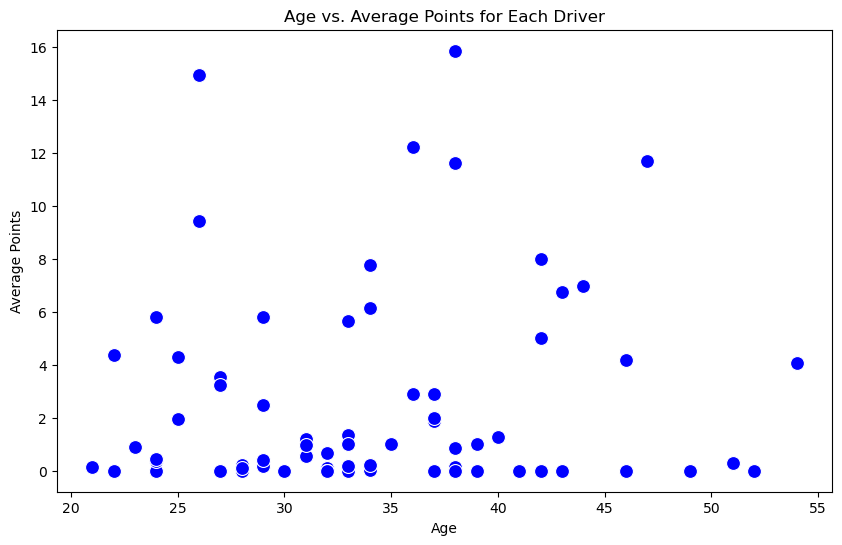

In [27]:

# Group by driverId and calculate the average points
grouped_data = resultDf.groupby('driverId').agg({'points': 'mean', 'age': 'first'}).reset_index()

# Scatter plot with a single color for all points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='points', data=grouped_data, color='blue', s=100)
plt.title('Age vs. Average Points for Each Driver')
plt.xlabel('Age')
plt.ylabel('Average Points')
plt.show()


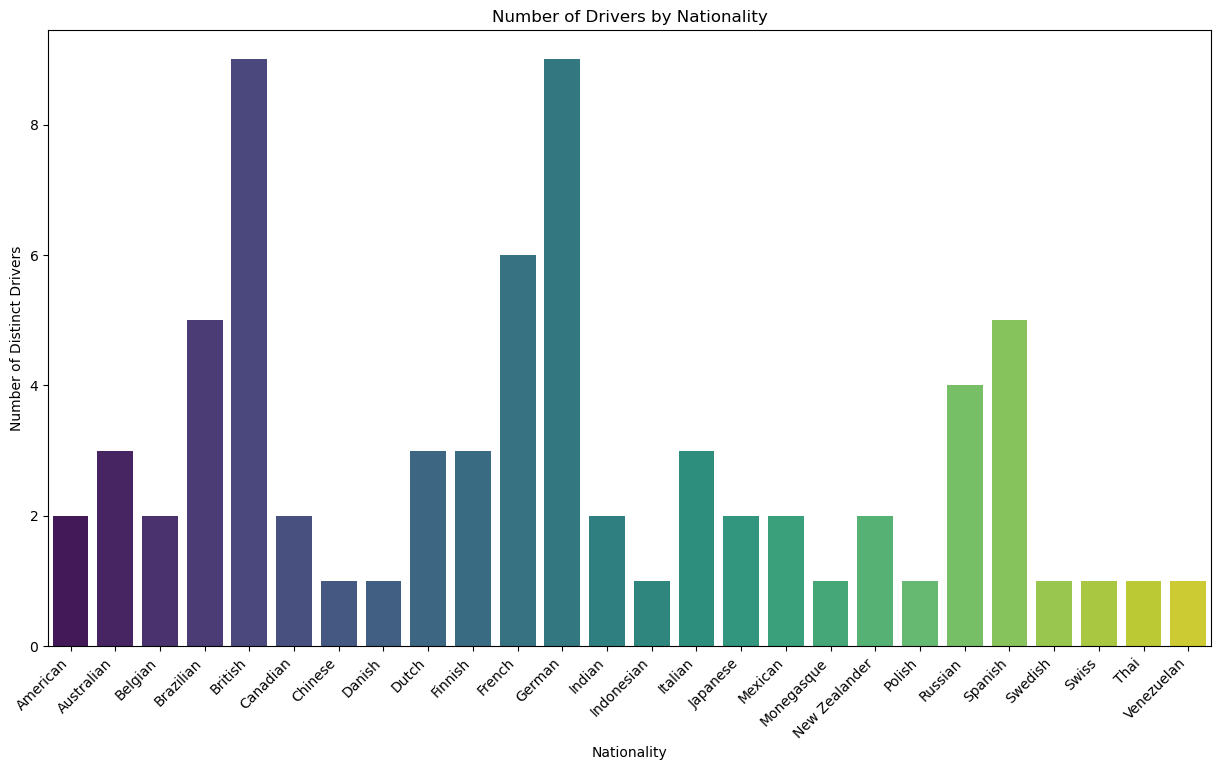

In [28]:

# Group by 'nationality' and count the distinct number of drivers
nationality_counts = resultDf.groupby('nationality')['driverId'].nunique()

# Plot the counts
plt.figure(figsize=(15, 8))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette='viridis')
plt.title('Number of Drivers by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Distinct Drivers')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

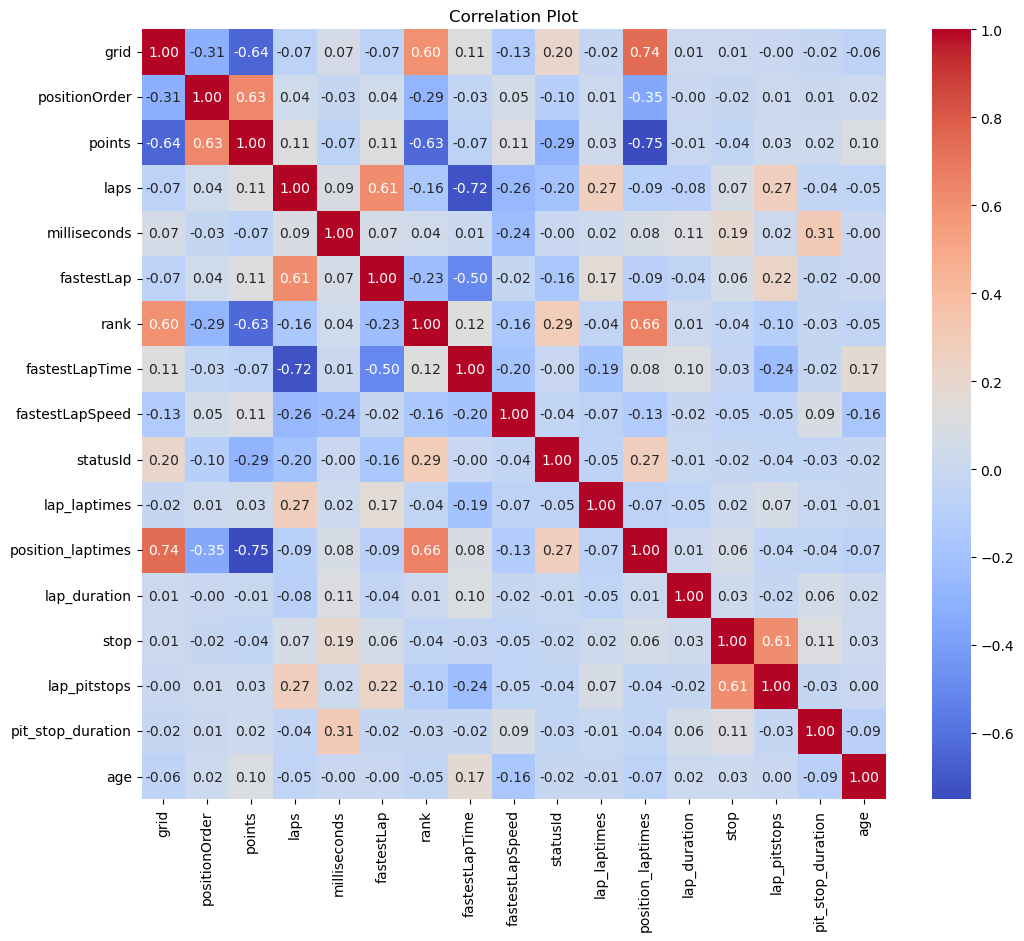

In [29]:

numeric_columns = resultDf.select_dtypes(include=['int64', 'float64','bool']).drop(columns=['resultId', 'raceId', 'driverId', 'constructorId', 'number']).columns
numeric_data = resultDf[numeric_columns]

# Create a correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [30]:
''''Based on the correlation matrix and considering the output variable 
as positionOrder (a boolean variable to predict the win),we can perform feature selection 
based on correlation and other criteria.'''

"'Based on the correlation matrix and considering the output variable \nas positionOrder (a boolean variable to predict the win),we can perform feature selection \nbased on correlation and other criteria."